# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"  # Replace with your API key

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # Send GET request to the API

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | garoua boulai
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | khovd
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | barah
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | thaba-tseka
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | varginha
Processing Record 21 of Set 1 | altai
Processing Record 22 of 

Processing Record 40 of Set 4 | toga village
City not found. Skipping...
Processing Record 41 of Set 4 | lumphat
Processing Record 42 of Set 4 | exu
Processing Record 43 of Set 4 | dryden
Processing Record 44 of Set 4 | antsiranana
Processing Record 45 of Set 4 | oranjemund
Processing Record 46 of Set 4 | tulun
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | bonthe
Processing Record 0 of Set 5 | santiago
Processing Record 1 of Set 5 | hayma'
City not found. Skipping...
Processing Record 2 of Set 5 | terrigal
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | shasta lake
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | kushiro
Processing Record 10 of Set 5 | almendralejo
Processing Record 11 of Set 5 | brisas de zicatela
Processing Record 12 of S

Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | baissa
Processing Record 36 of Set 8 | urazovo
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | pauini
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | wum
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | dhidhdhoo
Processing Record 43 of Set 8 | ondangwa
Processing Record 44 of Set 8 | mahur
Processing Record 45 of Set 8 | urzhum
Processing Record 46 of Set 8 | kaa-khem
Processing Record 47 of Set 8 | villa gesell
Processing Record 48 of Set 8 | shache
Processing Record 49 of Set 8 | camana
Processing Record 0 of Set 9 | tsagan aman
Processing Record 1 of Set 9 | fortuna foothills
Processing Record 2 of Set 9 | malango
Processing Record 3 of Set 9 | al qadarif
Processing Record 4 of Set 9 | caleta de carquin
Processing Record 5 of Set 9 | talnakh
Processing Record 6 of Set 9 | san pedro pochutla
Processing Record 7 of Set 9 | usinsk
Proc

City not found. Skipping...
Processing Record 24 of Set 12 | barra do corda
Processing Record 25 of Set 12 | maridi
Processing Record 26 of Set 12 | the pas
Processing Record 27 of Set 12 | athi river
Processing Record 28 of Set 12 | bodo
Processing Record 29 of Set 12 | ulladulla
Processing Record 30 of Set 12 | carauari
Processing Record 31 of Set 12 | duong dong
Processing Record 32 of Set 12 | bure
Processing Record 33 of Set 12 | alo
Processing Record 34 of Set 12 | bel ombre
Processing Record 35 of Set 12 | capanema
Processing Record 36 of Set 12 | togur
Processing Record 37 of Set 12 | kamina
Processing Record 38 of Set 12 | kone
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,275.49,86,100,6.54,SJ,1696030288
1,port-aux-francais,-49.3500,70.2167,274.16,71,12,18.42,TF,1696030273
2,grytviken,-54.2811,-36.5092,272.00,88,18,3.86,GS,1696030016
3,waitangi,-43.9535,-176.5597,285.83,79,100,3.13,NZ,1696030423
4,adamstown,-25.0660,-130.1015,293.81,83,21,10.18,PN,1696030274


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,275.49,86,100,6.54,SJ,1696030288
1,port-aux-francais,-49.3500,70.2167,274.16,71,12,18.42,TF,1696030273
2,grytviken,-54.2811,-36.5092,272.00,88,18,3.86,GS,1696030016
3,waitangi,-43.9535,-176.5597,285.83,79,100,3.13,NZ,1696030423
4,adamstown,-25.0660,-130.1015,293.81,83,21,10.18,PN,1696030274


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

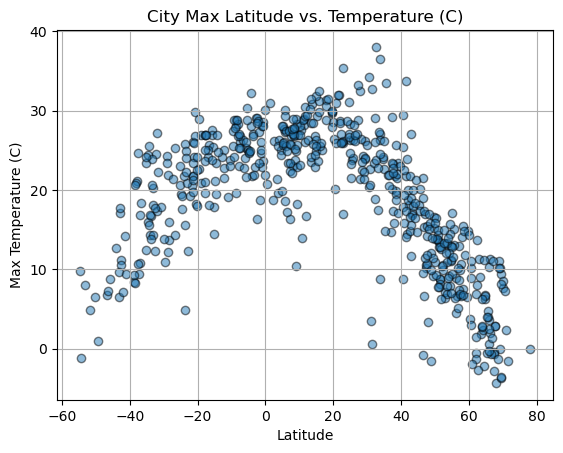

In [8]:
# Convert Max Temp from Kelvin to Celsius
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15

# Build scatter plot for latitude vs. temperature (in Celsius)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolor="black", alpha=0.5)

# Set the title and labels
plt.title("City Max Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

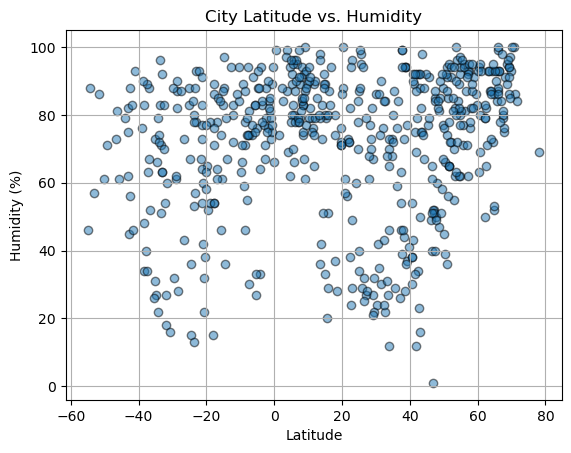

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

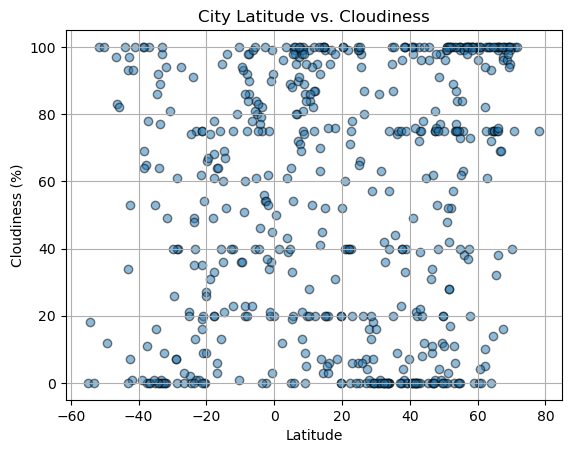

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

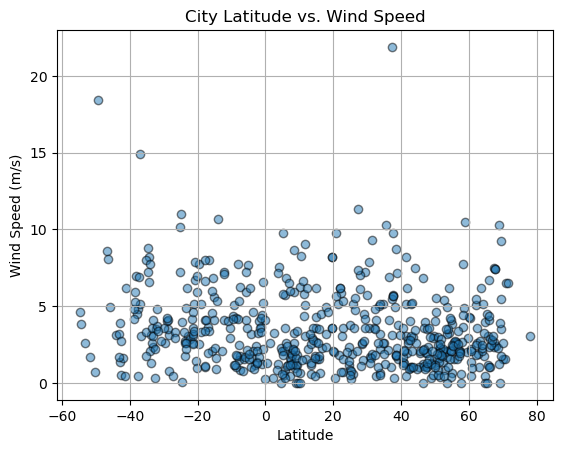

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define r_value before the linear regression code block
r_value = None

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's values
    regress_values = x_values * slope + intercept

    # Create the equation of the line
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.5)

    # Plot the regression line
    plt.plot(x_values, regress_values, label=f'Regression Line: {line_eq}')

    # Annotate the plot with the equation
    #plt.annotate(line_eq, hemisphere, fontsize=12, color="red")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.legend()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,275.49,86,100,6.54,SJ,1696030288,2.34
5,garoua boulai,5.8833,14.5500,291.72,96,99,0.84,CM,1696030423,18.57
6,bilibino,68.0546,166.4372,268.82,91,99,2.40,RU,1696030280,-4.33
7,san patricio,28.0170,-97.5169,305.67,61,16,6.10,US,1696030315,32.52
8,tiksi,71.6872,128.8694,271.55,84,100,6.50,RU,1696030016,-1.60


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,274.16,71,12,18.42,TF,1696030273,1.01
2,grytviken,-54.2811,-36.5092,272.00,88,18,3.86,GS,1696030016,-1.15
3,waitangi,-43.9535,-176.5597,285.83,79,100,3.13,NZ,1696030423,12.68
4,adamstown,-25.0660,-130.1015,293.81,83,21,10.18,PN,1696030274,20.66
16,puerto natales,-51.7236,-72.4875,278.08,86,100,1.69,CL,1696030425,4.93


###  Temperature vs. Latitude Linear Regression Plot

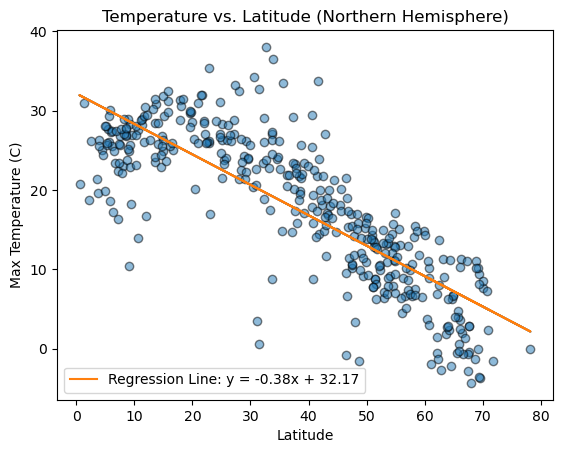

The r-value is: -0.81


In [15]:
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Max Temp from Kelvin to Celsius and assign it to a new column using .loc
northern_hemi_df.loc[:, "Max Temp (C)"] = northern_hemi_df["Max Temp"] - 273.15

# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"])

# Calculate the regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values)

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"], 
                       "Temperature vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Max Temperature (C)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")


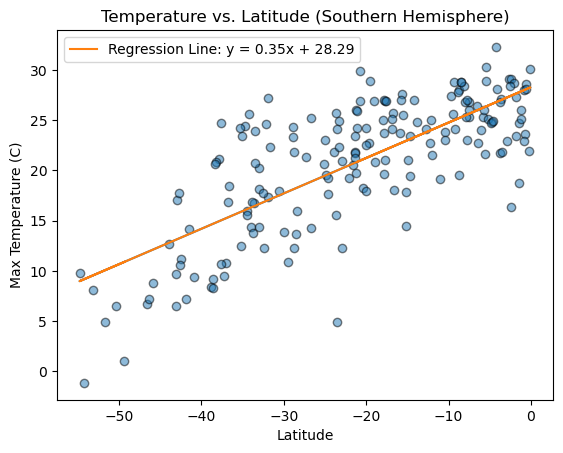

The r-value is: 0.75


In [16]:
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Max Temp from Kelvin to Celsius and assign it to a new column using .loc
southern_hemi_df.loc[:, "Max Temp (C)"] = southern_hemi_df["Max Temp"] - 273.15

# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (C)"])

# Calculate the regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values)

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (C)"], 
                       "Temperature vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Max Temperature (C)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")



**Discussion about the linear relationship:**

In the Northern Hemisphere, there is a negative correlation (r-value = -0.81) between latitude and temperature. As you move away from the equator (higher latitudes), temperatures tend to decrease. This relationship indicates that regions closer to the North Pole experience colder temperatures than those closer to the equator.
In the Southern Hemisphere, there is a positive correlation (r-value = 0.75) between latitude and temperature. As you move away from the South Pole (higher latitudes), temperatures tend to increase. This suggests that regions closer to the equator in the Southern Hemisphere tend to be warmer.

### Humidity vs. Latitude Linear Regression Plot

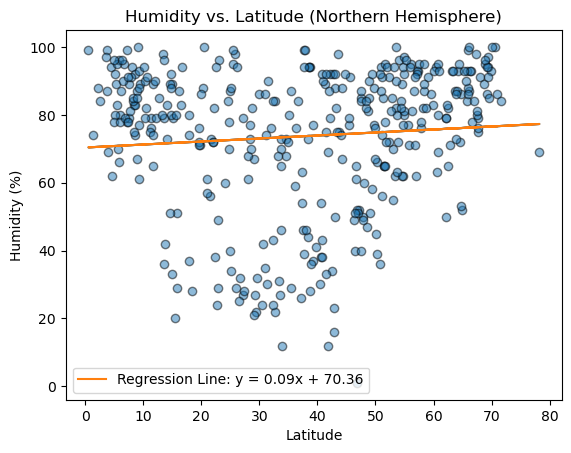

The r-value is: 0.08


In [17]:
# Northern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Humidity to % and assign it to a new column using .loc
northern_hemi_df.loc[:, "Humidity (%)"] = northern_hemi_df["Humidity"]

# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity (%)"])

# Calculate the regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values)

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity (%)"], 
                       "Humidity vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Humidity (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

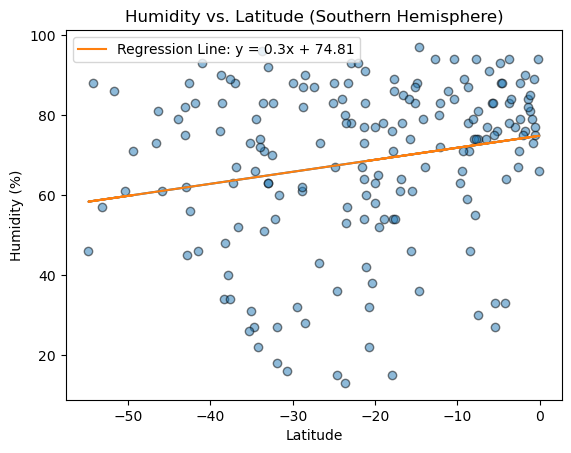

The r-value is: 0.21


In [18]:
# Southern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Humidity to % and assign it to a new column using .loc
southern_hemi_df.loc[:, "Humidity (%)"] = southern_hemi_df["Humidity"]

# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity (%)"])

# Calculate the regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values)

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity (%)"], 
                       "Humidity vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Humidity (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

**Discussion about the linear relationship:** 

The positive r-values in both hemispheres suggest a very weak positive correlation between humidity and latitude. This means that as you move away from the equator (towards higher latitudes) in either hemisphere, there is a slight tendency for humidity levels to increase, but the relationship is not strong.

### Cloudiness vs. Latitude Linear Regression Plot

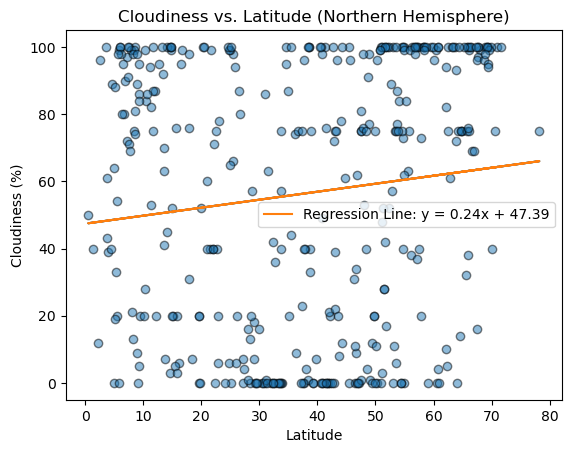

The r-value is: 0.12


In [19]:
# Northern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Cloudiness to % and assign it to a new column using .loc
northern_hemi_df.loc[:, "Cloudiness (%)"] = northern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness (%)"])

# Calculate the regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values)

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness (%)"], 
                       "Cloudiness vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Cloudiness (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

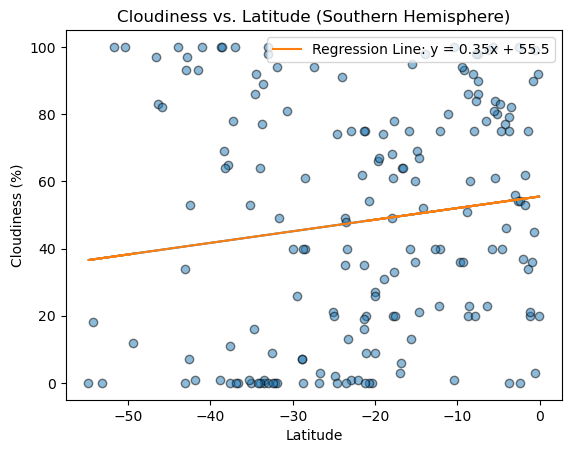

The r-value is: 0.14


In [20]:
# Southern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Cloudiness to % and assign it to a new column using .loc
southern_hemi_df.loc[:, "Cloudiness (%)"] = southern_hemi_df["Cloudiness"]

# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness (%)"])

# Calculate the regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values)

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness (%)"], 
                       "Cloudiness vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Cloudiness (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

**Discussion about the linear relationship:** 

The r-values of 0.12 for the Northern Hemisphere and 0.14 for the Southern Hemisphere in the relationship between cloudiness and latitude indicate a very weak positive correlation. This suggests that there is little to no meaningful linear relationship between cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

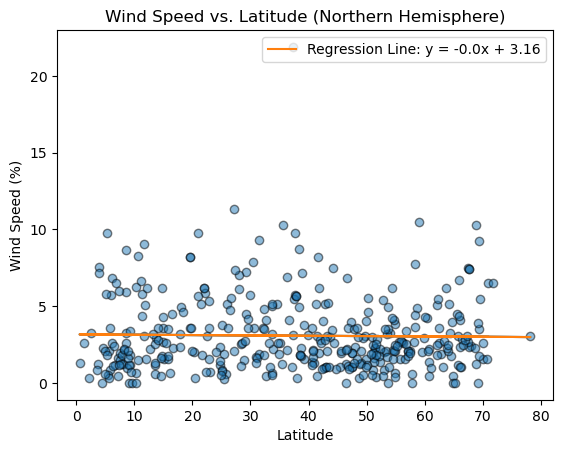

The r-value is: -0.02


In [21]:
# Northern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Wind Speed to % and assign it to a new column using .loc
northern_hemi_df.loc[:, "Wind Speed (%)"] = northern_hemi_df["Wind Speed"]

# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed (%)"])

# Calculate the regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values)

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed (%)"], 
                       "Wind Speed vs. Latitude (Northern Hemisphere)", 
                       "Latitude", "Wind Speed (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

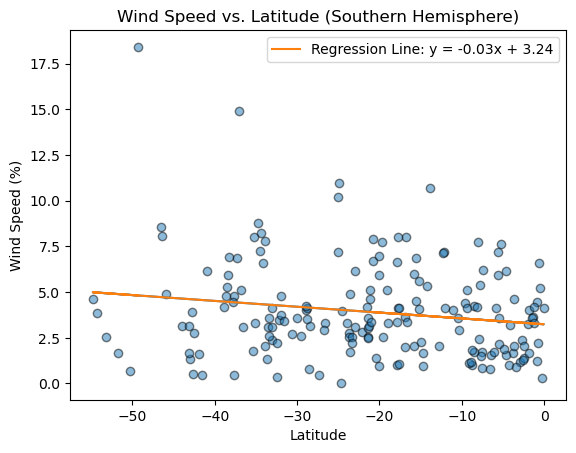

The r-value is: -0.17


In [22]:
# Southern Hemisphere
# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Convert Wind Speed to % and assign it to a new column using .loc
southern_hemi_df.loc[:, "Wind Speed (%)"] = southern_hemi_df["Wind Speed"]

# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed (%)"])

# Calculate the regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values)

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed (%)"], 
                       "Wind Speed vs. Latitude (Southern Hemisphere)", 
                       "Latitude", "Wind Speed (%)", (0, 0))

# Re-enable the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

**Discussion about the linear relationship:** 

The r-values of -0.02 for the Northern Hemisphere and -0.17 for the Southern Hemisphere in the relationship between wind speed and latitude indicate a very weak negative correlation. This suggests that there is little to no meaningful linear relationship between wind speed and latitude in either hemisphere. 